## Exercise: Bank Customer Churn Prediction Using Artificial Neural Network (ANN)

1. Take this dataset for bank customer churn prediction : https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling
2. Build a deep learning model to predict churn rate at bank.
3. Once model is built, print classification report and analyze precision, recall and f1-score

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
# Check CPU/DPU Devices
# My scomputer with GeForce RTX
import tensorflow as tf
print('***tf.config.experimental.list_physical_devices()***:')
print(tf.config.experimental.list_physical_devices())
print()
print('***tf.__version__***:', tf.__version__)     # 2.41.1
print()
print('***tf.test.is_built_with_cuda()***:', tf.test.is_built_with_cuda()) # True

2024-04-03 21:08:39.484327: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-03 21:08:39.484376: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-03 21:08:39.485509: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-03 21:08:39.491722: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-03 21:08:40.291711: W tensorflow/compiler/tf2

***tf.config.experimental.list_physical_devices()***:
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

***tf.__version__***: 2.15.0

***tf.test.is_built_with_cuda()***: True


2024-04-03 21:08:40.968169: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-03 21:08:41.012389: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-03 21:08:41.012582: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

**Load the data**

In [5]:
df = pd.read_csv("bank_customer_churn.csv")
df.sample(5)

RowNumber  CustomerId     Surname  CreditScore Geography  Gender  Age  \
4060       4061    15593250       Hsiao          640    France  Female   29   
6140       6141    15785042      Hsiung          488    France  Female   31   
8930       8931    15665759     Russell          724    France  Female   69   
6722       6723    15750602  Clendinnen          662    France    Male   29   
5127       5128    15644796        Dyer          821     Spain  Female   38   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
4060       4       0.00              2          1               0   
6140       8   97588.60              1          0               0   
8930       5  117866.92              1          1               1   
6722       5  147092.65              1          1               0   
5127       8       0.00              2          0               1   

      EstimatedSalary  Exited  
4060         44904.26       0  
6140        124210.53       0  
8930         62280.91       0  
6722         10928.30       0  
5127        126241.40       1

**First of all, drop CustomerId column as it is of no use**

In [6]:
#df.drop('customerID',axis='columns',inplace=True)
df.drop('CustomerId',axis='columns',inplace=True)

In [7]:
df.drop('Surname',axis='columns',inplace=True)

In [8]:
df.drop('RowNumber',axis='columns',inplace=True)

In [9]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

**Quick glance at above makes me realize that TotalCharges should be float but it is an object. Let's check what's going on with  this column**

In [10]:
#print('df.TotalCharges.values:', df.TotalCharges.values)
# df.TotalCharges.values: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
#print('df.MonthlyCharges.values:', df.MonthlyCharges.values)
# df.MonthlyCharges.values: [ 29.85  56.95  53.85 ...  29.6   74.4  105.65]
print('df.Balance.values:', df.Balance.values)
print('df.EstimatedSalary.values:', df.EstimatedSalary.values)

df.Balance.values: [     0.    83807.86 159660.8  ...      0.    75075.31 130142.79]
df.EstimatedSalary.values: [101348.88 112542.58 113931.57 ...  42085.58  92888.52  38190.78]


**Ahh... it is string. Lets convert it to numbers**

In [11]:
#pd.to_numeric(df.TotalCharges)
# We are getting error because there are some values are spaces (" ").
pd.to_numeric(df.Balance)

0            0.00
1        83807.86
2       159660.80
3            0.00
4       125510.82
          ...    
9995         0.00
9996     57369.61
9997         0.00
9998     75075.31
9999    130142.79
Name: Balance, Length: 10000, dtype: float64

In [12]:
pd.to_numeric(df.EstimatedSalary)

0       101348.88
1       112542.58
2       113931.57
3        93826.63
4        79084.10
          ...    
9995     96270.64
9996    101699.77
9997     42085.58
9998     92888.52
9999     38190.78
Name: EstimatedSalary, Length: 10000, dtype: float64

In [13]:
# **Hmmm... some values seems to be not numbers but blank string. Let's find out such rows**
# We do not have empty value problem in bank Customer Churn **

In [14]:
# We can use 'coerce' to set the row objec to True if data is NULL (' ').
# Below, we can see res1 is False (not null). 
# Only 11 is null (' '): True. Most (7032) are not null: (False)
#res = pd.to_numeric(df.TotalCharges, errors='coerce').isnull()
res = pd.to_numeric(df.Balance, errors='coerce').isnull()
index_cnt = 0
null_cnt = 0
not_null_cnt = 0
for res1 in res:
    if res1 == True:
        print(index_cnt, " res1: ", res1)
        null_cnt += 1
    else:
        not_null_cnt += 1
    index_cnt += 1
print('null_cnt:', null_cnt)
print('not_null_cnt:', not_null_cnt)
print('index_cnt:', index_cnt)
# errors{‘ignore’, ‘raise’, ‘coerce’}, default ‘raise’
# If ‘raise’, then invalid parsing will raise an exception.
# If ‘coerce’, then invalid parsing will be set as NaN.
# If ‘ignore’, then invalid parsing will return the input.

null_cnt: 0
not_null_cnt: 10000
index_cnt: 10000


In [15]:
# We use 'coerce' to set the object to True for ' ' (null).
# If data is number (not null), then object is False.
#pd.to_numeric(df.TotalCharges, errors='coerce').isnull()
# There are only few (11) are "True". Most (7032) of them are "False" 
pd.to_numeric(df.Balance, errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: Balance, Length: 10000, dtype: bool

In [16]:
# We convert all of the not NULL data into numberic.
#df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]
# we print all the Null TotalCharges.
df[pd.to_numeric(df.Balance,errors='coerce').isnull()]

Empty DataFrame
Columns: [CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: []

In [17]:
df[pd.to_numeric(df.EstimatedSalary,errors='coerce').isnull()]

Empty DataFrame
Columns: [CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: []

In [18]:
df.shape

(10000, 11)

In [19]:
#df.iloc[488].TotalCharges

In [20]:
#df[df.TotalCharges!=' '].shape
df[df.Balance!=' '].shape

(10000, 11)

In [21]:
df[df.EstimatedSalary!=' '].shape

(10000, 11)

**Remove rows with space in TotalCharges**

In [22]:
# We convert not null to df1.
# We drop the null data to df1.
#df1 = df[df.TotalCharges!=' ']
df1 = df[df.Balance!=' ']
df2 = df[df.EstimatedSalary!=' ']
print('df1.shape:', df1.shape)
print('df2.shape:', df2.shape)

df1.shape: (10000, 11)
df2.shape: (10000, 11)


In [23]:
print('df1.dtypes:', df1.dtypes)

df1.dtypes: CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


In [24]:
#df1.TotalCharges = pd.to_numeric(df1.TotalCharges)
# Below code is unncessary since all data are valid.
df1.Balance = pd.to_numeric(df1.Balance)
df1.EstimatedSalaray = pd.to_numeric(df1.EstimatedSalary)

/tmp/ipykernel_44065/2130888203.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df1.EstimatedSalaray = pd.to_numeric(df1.EstimatedSalary)


In [25]:
#print('df1.TotalCharges.values:', df1.TotalCharges.values)
#print('df1.TotalCharges.dtypes:', df1.TotalCharges.dtypes)
print('df1.Balance.values:', df1.Balance.values)
print('df1.Balance.dtypes:', df1.Balance.dtypes)
print('df1.EstimatedSalary.values:', df1.EstimatedSalary.values)
print('df1.EstimatedSalary.dtypes:', df1.EstimatedSalary.dtypes)

df1.Balance.values: [     0.    83807.86 159660.8  ...      0.    75075.31 130142.79]
df1.Balance.dtypes: float64
df1.EstimatedSalary.values: [101348.88 112542.58 113931.57 ...  42085.58  92888.52  38190.78]
df1.EstimatedSalary.dtypes: float64


In [26]:
#df1[df1.Churn=='No']
df1[df1.Exited==0]

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
1             608     Spain  Female   41       1   83807.86              1   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
6             822    France    Male   50       7       0.00              2   
8             501    France    Male   44       4  142051.07              2   
...           ...       ...     ...  ...     ...        ...            ...   
9993          644    France    Male   28       7  155060.41              1   
9994          800    France  Female   29       2       0.00              2   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
1             0               1        112542.58       0  
3             0               0         93826.63       0  
4             1               1         79084.10       0  
6             1               1         10062.80       0  
8             0               1         74940.50       0  
...         ...             ...              ...     ...  
9993          1               0         29179.52       0  
9994          0               0        167773.55       0  
9995          1               0         96270.64       0  
9996          1               1        101699.77       0  
9999          1               0         38190.78       0  

[7963 rows x 11 columns]

**Data Visualization**

df1[df1.Exited==0].Tenure:
1        1
3        1
4        2
6        7
8        4
        ..
9993     7
9994     2
9995     5
9996    10
9999     4
Name: Tenure, Length: 7963, dtype: int64
tenure_churn_no:
1        1
3        1
4        2
6        7
8        4
        ..
9993     7
9994     2
9995     5
9996    10
9999     4
Name: Tenure, Length: 7963, dtype: int64


(array([[  95.,  232.,  201.,  213.,  203.,  209.,  196.,  177.,  197.,
          314.],
        [ 318.,  803.,  847.,  796.,  786.,  803.,  771.,  851.,  828.,
         1160.]]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 2 BarContainer objects>)

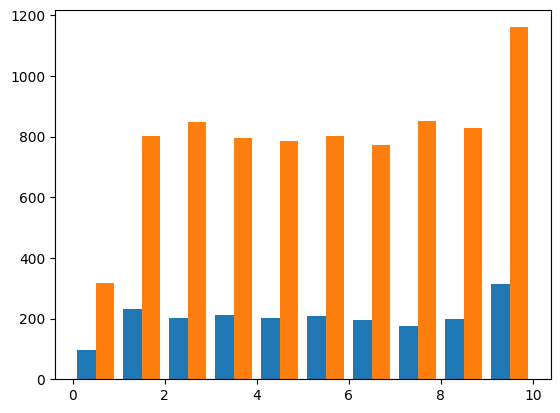

In [27]:
# We visualize the Tensure.
# Draw the history is a good idea.
# To see the customer distribution of "Not Leaving".
#print("df1[df1.Churn=='No'].tenure:")
#print(df1[df1.Churn=='No'].tenure)
print("df1[df1.Exited==0].Tenure:")
print(df1[df1.Exited==0].Tenure)
# We assign the customer is not leaveing (Churn = 'No')
#tenure_churn_no = df1[df1.Churn=='No'].tenure
#print('tenure_churn_no:')
#print(tenure_churn_no)
tenure_churn_no = df1[df1.Exited==0].Tenure
print('tenure_churn_no:')
print(tenure_churn_no)
# We assign the customer is leaveing (Churn = 'Yes')
#tenure_churn_yes = df1[df1.Churn=='Yes'].tenure
tenure_churn_yes = df1[df1.Exited==1].Tenure
# We display customer 'is not leaving' and 'is leaving'. 
plt.hist([tenure_churn_yes, tenure_churn_no])

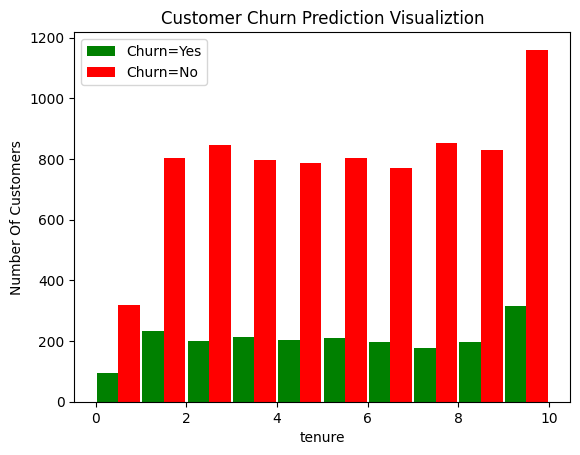

In [28]:
# We make the display with labels: Customer ount vs tensure 
#tenure_churn_no = df1[df1.Churn=='No'].tenure
#tenure_churn_yes = df1[df1.Churn=='Yes'].tenure
tenure_churn_no = df1[df1.Exited==0].Tenure
tenure_churn_yes = df1[df1.Exited==1].Tenure
plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

#blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
#blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, 
         color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()
# Longer tenure will not leave.

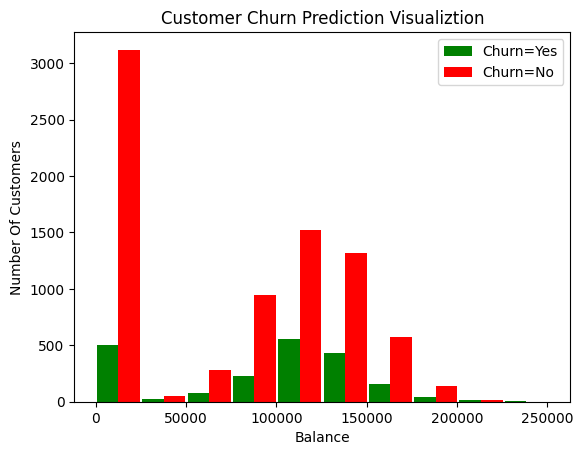

In [29]:
# Customer count vs. Mondy amount Charge
#mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
#mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      
bl_churn_no = df1[df1.Exited==0].Balance      
bl_churn_yes = df1[df1.Exited==1].Balance

plt.xlabel("Balance")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

#blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
#blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([bl_churn_yes, bl_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()
# High monthly pay customer will leave (churn = yes)

**Many of the columns are yes, no etc. Let's print unique values in object columns to see data values**

In [30]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [31]:
print_unique_col_values(df1)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


**Some of the columns have no internet service or no phone service, that can be replaced with a simple No**

In [32]:
#df1.replace('No internet service','No',inplace=True)
#df1.replace('No phone service','No',inplace=True)
# We do not have more than 2 types of text/string data

In [33]:
print_unique_col_values(df1)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


**Convert Yes and No to 1 or 0**

In [34]:
#yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
#                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
# we only have 0 and 1. We do not have 'yes'/'no'
#for col in yes_no_columns:
#    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

In [35]:
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

CreditScore: [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 5

In [36]:
#df1['gender'].replace({'Female':1,'Male':0},inplace=True)
df1['Gender'].replace({'Female':1,'Male':0},inplace=True)
print ("df1['Gender']:", df1['Gender'])

df1['Gender']: 0       1
1       1
2       1
3       1
4       1
       ..
9995    0
9996    0
9997    1
9998    0
9999    1
Name: Gender, Length: 10000, dtype: int64


In [37]:
#df1.gender.unique()
df1.Gender.unique()

array([1, 0])

**One hot encoding for categorical columns**

In [38]:
#df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2 = pd.get_dummies(data=df1, columns=['Geography', 'NumOfProducts'])
df2.columns
# On-hot enoding in Geopgray: 'Geography_France', 'Geography_Germany', 'Geography_Spain']

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'NumOfProducts_1',
       'NumOfProducts_2', 'NumOfProducts_3', 'NumOfProducts_4'],
      dtype='object')

In [39]:
df2.sample(5)

CreditScore  Gender  Age  Tenure    Balance  HasCrCard  IsActiveMember  \
1794          823       0   38       1       0.00          1               0   
8948          583       0   48       3   91246.53          1               0   
5359          684       0   42       1  117691.00          1               1   
4572          669       1   30       7  139872.81          1               0   
4521          560       1   27       7  124995.98          1               1   

      EstimatedSalary  Exited  Geography_France  Geography_Germany  \
1794        156603.70       0                 1                  0   
8948         60017.46       1                 1                  0   
5359         23135.65       1                 0                  1   
4572        188795.85       0                 0                  1   
4521        114669.79       0                 0                  0   

      Geography_Spain  NumOfProducts_1  NumOfProducts_2  NumOfProducts_3  \
1794                0                0                1                0   
8948                0                1                0                0   
5359                0                1                0                0   
4572                0                1                0                0   
4521                1                1                0                0   

      NumOfProducts_4  
1794                0  
8948                0  
5359                0  
4572                0  
4521                0

In [40]:
#print("df2['tenure'].loc[:2]:")
#print(df2['tenure'].loc[:2])
#print()
#print("df2['MonthlyCharges'].loc[:2]:")
#print(df2['MonthlyCharges'].loc[:2])
#print()
#print("df2['TotalCharges']loc[:2]:")
#print(df2['TotalCharges'].loc[:2])
print("df2['Tenure'].loc[:2]:")
print(df2['Tenure'].loc[:2])
print()
print("df2['Balance'].loc[:2]:")
print(df2['Balance'].loc[:2])
print()
print("df2['EstimatedSalary']loc[:2]:")
print(df2['EstimatedSalary'].loc[:2])

df2['Tenure'].loc[:2]:
0    2
1    1
2    8
Name: Tenure, dtype: int64

df2['Balance'].loc[:2]:
0         0.00
1     83807.86
2    159660.80
Name: Balance, dtype: float64

df2['EstimatedSalary']loc[:2]:
0    101348.88
1    112542.58
2    113931.57
Name: EstimatedSalary, dtype: float64


In [41]:
#cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']
cols_to_scale = ['CreditScore', 'Age', 'Tenure','Balance','EstimatedSalary']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [42]:
df2.sample(5)

CreditScore  Gender       Age  Tenure   Balance  HasCrCard  \
1167        0.396       1  0.229730     1.0  0.000000          1   
865         0.656       1  0.094595     1.0  0.306770          0   
3860        0.740       1  0.216216     0.6  0.441284          1   
2114        0.764       0  0.202703     0.8  0.000000          1   
5913        0.658       0  0.324324     0.2  0.000000          1   

      IsActiveMember  EstimatedSalary  Exited  Geography_France  \
1167               1         0.156456       0                 1   
865                1         0.657513       0                 0   
3860               1         0.046939       0                 1   
2114               0         0.599413       0                 0   
5913               1         0.841494       0                 0   

      Geography_Germany  Geography_Spain  NumOfProducts_1  NumOfProducts_2  \
1167                  0                0                1                0   
865                   1                0                0                1   
3860                  0                0                1                0   
2114                  0                1                1                0   
5913                  0                1                1                0   

      NumOfProducts_3  NumOfProducts_4  
1167                0                0  
865                 0                0  
3860                0                0  
2114                0                0  
5913                0                0

In [43]:
# Check the Scale data.
#print("df2['tenure'].loc[:2]:")
#print(df2['tenure'].loc[:2])
#print()
#print("df2['MonthlyCharges'].loc[:2]:")
#print(df2['MonthlyCharges'].loc[:2])
#print()
#print("df2['TotalCharges'].loc[:2]:")
#print(df2['TotalCharges'].loc[:2])

print("df2['Tenure'].loc[:2]:")
print(df2['Tenure'].loc[:2])
print()
print("df2['Balance'].loc[:2]:")
print(df2['Balance'].loc[:2])
print()
print("df2['EstimatedSalary'].loc[:2]:")
print(df2['EstimatedSalary'].loc[:2])

df2['Tenure'].loc[:2]:
0    0.2
1    0.1
2    0.8
Name: Tenure, dtype: float64

df2['Balance'].loc[:2]:
0    0.000000
1    0.334031
2    0.636357
Name: Balance, dtype: float64

df2['EstimatedSalary'].loc[:2]:
0    0.506735
1    0.562709
2    0.569654
Name: EstimatedSalary, dtype: float64


In [44]:
# Check all data type. Should be all defined (int or float). 
# No ambuguous 'object'
df2.dtypes

CreditScore          float64
Gender                 int64
Age                  float64
Tenure               float64
Balance              float64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
NumOfProducts_1        uint8
NumOfProducts_2        uint8
NumOfProducts_3        uint8
NumOfProducts_4        uint8
dtype: object

In [45]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

CreditScore: [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.4

**Train test split**

In [46]:
#X = df2.drop('Churn',axis='columns')
#y = df2['Churn']
X = df2.drop('Exited',axis='columns')
y = df2['Exited']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [47]:
X_train.shape

(8000, 15)

In [48]:
X_test.shape

(2000, 15)

In [49]:
X_train[:10]

CreditScore  Gender       Age  Tenure   Balance  HasCrCard  \
7751        0.800       1  0.283784     0.6  0.000000          0   
4154        0.752       0  0.216216     0.3  0.000000          1   
3881        0.476       1  0.621622     0.3  0.000000          1   
9238        0.846       1  0.432432     0.4  0.000000          1   
5210        0.402       0  0.229730     0.7  0.517012          0   
7487        0.602       1  0.513514     0.4  0.000000          0   
7542        0.314       1  0.216216     0.4  0.000000          1   
7524        0.620       1  0.297297     0.8  0.666330          1   
9412        0.750       0  0.108108     0.6  0.393324          0   
6377        0.684       0  0.202703     0.9  0.000000          1   

      IsActiveMember  EstimatedSalary  Geography_France  Geography_Germany  \
7751               0         0.096273                 0                  0   
4154               0         0.981478                 1                  0   
3881               1         0.948551                 1                  0   
9238               0         0.646869                 1                  0   
5210               0         0.434670                 1                  0   
7487               0         0.421898                 1                  0   
7542               1         0.303413                 0                  0   
7524               1         0.925815                 1                  0   
9412               0         0.668609                 1                  0   
6377               0         0.567526                 1                  0   

      Geography_Spain  NumOfProducts_1  NumOfProducts_2  NumOfProducts_3  \
7751                1                0                1                0   
4154                0                0                1                0   
3881                0                1                0                0   
9238                0                0                1                0   
5210                0                0                1                0   
7487                0                1                0                0   
7542                1                0                1                0   
7524                0                1                0                0   
9412                0                1                0                0   
6377                0                1                0                0   

      NumOfProducts_4  
7751                0  
4154                0  
3881                0  
9238                0  
5210                0  
7487                0  
7542                0  
7524                0  
9412                0  
6377                0

In [50]:
len(X_train.columns)

15

**Build a model (ANN) in tensorflow/keras**

In [51]:
import tensorflow as tf
from tensorflow import keras


#model = keras.Sequential([
#    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
#    keras.layers.Dense(15, activation='relu'),
#    keras.layers.Dense(1, activation='sigmoid')
#])
model = keras.Sequential([
    keras.layers.Dense(15, input_shape=(15,), activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100


2024-04-03 21:08:42.762915: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-03 21:08:42.763335: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-03 21:08:42.763540: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

250/250 [==============================] - 2s 2ms/step - loss: 0.5411 - accuracy: 0.7249
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4196 - accuracy: 0.8077
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3942 - accuracy: 0.8296
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3810 - accuracy: 0.8380
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3761 - accuracy: 0.8393
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3741 - accuracy: 0.8435
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3709 - accuracy: 0.8422
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3702 - accuracy: 0.8428
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3692 - accuracy: 0.8454
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3675 - accuracy: 0.8449
E

In [52]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.3526 - accuracy: 0.8525


[0.3526161015033722, 0.8525000214576721]

In [53]:
yp = model.predict(X_test)
yp[:5]

63/63 [==============================] - 0s 1ms/step


array([[0.03836888],
       [0.09906871],
       [0.08621671],
       [0.11626737],
       [0.08157856]], dtype=float32)

In [54]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [55]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [56]:
y_test.iloc[:10]

7054    0
442     0
3954    0
2288    0
3196    0
6178    0
8351    0
5658    1
2065    0
413     1
Name: Exited, dtype: int64

In [57]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1595
           1       0.74      0.42      0.54       405

    accuracy                           0.85      2000
   macro avg       0.80      0.69      0.73      2000
weighted avg       0.84      0.85      0.84      2000



Text(95.72222222222221, 0.5, 'Truth')

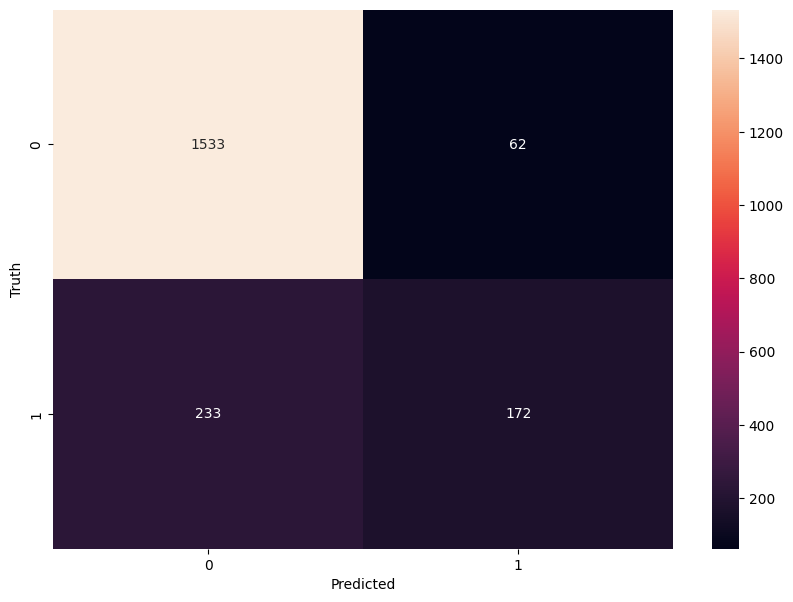

In [58]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [59]:
y_test.shape

(2000,)

**Accuracy**

In [60]:
#  872 | 127
#  ----------
#  190 | 218
#round((872+218)/(872+218+127+190),2) 
#  1533 | 62
#  ----------
#   235 | 170
round((1533+170)/(1533+62+235+170),2) 

0.85

**Precision for 0 class. i.e. Precision for customers who did not churn**

In [61]:
# Precision for class 0
#  872 | 127
#  ----------
#  190 | 218
#round(872/(872+190),2)  

#  1533 | 62
#  ----------
#   235 | 170
round(1533/(1533+235),2) 

0.87

**Precision for 1 class. i.e. Precision for customers who actually churned**

In [62]:
# Precision class 1
#  872 | 127
#  ----------
#  190 | 218
# round(218/(218+127),2)  
#  1533 | 62
#  ----------
#   235 | 170
round(170/(170+62),2)  

0.73

**Recall for 0 class**

In [63]:
#  872 | 127
#  ----------
#  190 | 218
# round(872/(872+127),2) 

#  1533 | 62
#  ----------
#   235 | 170
round(1533/(1533+62),2) 

0.96

**Recall for 1 class**

In [64]:
#  872 | 127
#  ----------
#  190 | 218
#round(218/(218+190),2)  

#  1533 | 62
#  ----------
#   235 | 170
round(170/(170+235),2) 

0.42